$${\color{yellow}{\text{Applied Linear Algebra---Vectors and Matrices}}}$$



---

Load essential libraries

---

---

After reinstalling numpy and gensim, go to *Runtime -> Restart Session* and execute from the following cell onward:

---

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline
import sys
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
import nltk
import gensim.downloader
from nltk.tokenize import word_tokenize

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---

Mount Google Drive folder if running Google Colab

---

In [10]:
## Mount Google drive folder if running in Colab
if('google.colab' in sys.modules):
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)

    DIR = '/content/drive/MyDrive/Colab Notebooks/'
    DATA_DIR = DIR+'ALA/'
else:
    DATA_DIR = 'Data/'

Mounted at /content/drive


---

**We will now use Pytorch to create tensors**

The patient data matrix:

![patient data matrix](https://1drv.ms/i/s!AjTcbXuSD3I3hsxIkL4V93-CGq8RkQ?embed=1&width=1000)

**Notation**:

Zeroth patient vector $\mathbf{x}^{(0)}= \begin{bmatrix}72\\120\\37.3\\104\\32.5\end{bmatrix}$ and zeroth feature (heart rate vector) $\mathbf{x}_0 = \begin{bmatrix}72\\85\\68\\90\\84\\78\end{bmatrix}.$

---



In [ ]:
## Create a patient data matrix as a constant tensor
X = torch.tensor([[72,120,37.3,104,32.5],
                  [85,130,37.0,110,14],
                  [68,110,38.5,125,34],
                  [90,140,78.0,130,26],
                  [84,132,38.3,146,30],
                  [78,128,37.2,102,12]])
print(X)
print(X.shape)
print(type(X))
print(X[0]) #this is patient-0 information which itself is a rank-1 information
print(X[0,:]) # all features of patient-0 same as the above
print('--------')
print(X[0,2]) #feature 2 of patient 0 temparature  of patient-0
print(X[:,2]) #feature 2 of all patient , temparature of all patient


---

**Convert a PyTorch object into a numpy array**

---

In [ ]:
print(X.numpy())
print(type(X.numpy()))


---

**Addition and subtraction of vectors, scalar multiplication (apply operation componentwise)**

![vector addition](https://1drv.ms/i/c/37720f927b6ddc34/IQQ03G17kg9yIIA3NokBAAAAAZLAaAoWwhtn8Vk26NotALo?width=256)

![vector subtracton](https://1drv.ms/i/c/37720f927b6ddc34/IQQ03G17kg9yIIA3M4kBAAAAAU_n_mAEv006QFZm_sUj2Dc?width=256)

![vector multiplication](https://1drv.ms/i/c/37720f927b6ddc34/IQQ03G17kg9yIIA3NIkBAAAAAa_qL04bLT4kWoNeHcrR9LQ?width=256)

![vector geometry1](https://1drv.ms/i/c/37720f927b6ddc34/IQSGNMr5z3SSRry7LSKL7LybAcGYuzgw5smabV8-6DudXIs?width=230)

![vector geometry2](https://1drv.ms/i/c/37720f927b6ddc34/IQQ03G17kg9yIIA3WokBAAAAAQi8FPV9YCebl5WnyEKJ3vg?width=213&height=192)


---

In [ ]:
# Vector addition
print(X[1,:]+X[2,:])

# Vector subtraction

print(X[1,:]-X[2,:])

# Scalar-vector multiplication (the temperature of all patients)

print(X[:,2])
print((9/5)*X[:,2]+32)# Operation not defined in pen & paper but in computation is referred to as # broadcasting


# Average patient
x_avg = (1/6)*(X[0,:]+X[1,:]+X[2,:]+X[3,:]+X[4,:]+X[5,:])
x_avg = torch.mean(X, dim=0)

#another broadcasting example
print(X)
print(x_avg)
print(X - x_avg)


---

Application of vector subtraction in natural language processing (NLP): download the word embedding model trained on Wikipedia articles.

---

In [ ]:
model = gensim.downloader.load('glove-wiki-gigaword-50')

---

Now we will see what embedding vector comes as a result of applying the model for the words *cricket* and *football*.

Next, we will do an *intuitive* subtraction of word embeddings as in

1. Cricket without Tendulkar
2. Football without Messi

Note that the embedding vectors have 50 components corresponding to the 50-dimensional embedding of model suggested by the name '**glove-wiki-gigaword-50**'

---

In [ ]:
print(model['apple'])
# a = model['cricket']-model['tendulkar']
# b = model['football']-model['messi']
# print(a)
# print(b)

#how diffrent cricket without thendulkar from football without messi
# print(a-b)

---

A tensor of rank 3 corresponding to 4 time stamps (hourly), 3 samples (patients), 2 features (HR and BP). Assume that admission time is 9AM.

---

In [ ]:
# A rank-3 patient tensor with shape (4, 3, 2)
# with meaning for
# dim-0 as 4 hourly timestamps,
# dim-1 as 3 patients, and
# dim-2 as 2 features (HR and BP)
T = torch.tensor([[[74., 128], [79, 116], [71, 116]],
                 [[78, 118], [82, 124], [72, 128]],
                 [[84, 138], [84, 130], [74, 120]],
                 [[82, 126], [76, 156], [82, 132]]])
print(T)

---

**Accessing elements of a tensor**

---

In [ ]:
## Accessing elements of a tensor
# Rank-3 tensor T has axes order (timestamps, patients, features)

# Element of T at postion 3 w.r.t. axis-0, position 2 w.r.t. axis-1, position-1 w.r.t axis-2
# print(T[3,2,1])

# Element-0 of object T which is also the info for all patients at admission time 9AM
print(T[0,:])

# Patient-2 info at 12PM
print(T[-1,2])

---

**Broadcasting**

---

In [ ]:
# A simple broadcasting example
a = torch.tensor([[1.0, 2.0, 3.0]])
b = torch.tensor([4.0])
print(a.shape)
print(b.shape)
print(a-b)

In [ ]:
# How to add a new axis to a tensor using the unsqueeze() method


In [ ]:
# How different are the patients from patient-0?
#T - T[:, 0, :] # does not work for broadcasting


#  # How different are the patients compared to their time at admission


---

**Exercise**: interpret $\texttt{T[:, -1, :]}$

---

In [ ]:
# Last patient's info at all timestamps


---

$l_2$ norm or the geometric length of a vector denoted as $\lVert \mathbf{a}\rVert$ tells us how long a vector is. In 2-dimensions, $$\lVert \mathbf{a}\rVert_2 = \sqrt{a_1^2+a_2^2}$$ and in $n$-dimensions, $$\lVert \mathbf{a}\rVert_2 = \sqrt{a_1^2+a_2^2+\cdots+a_n^2}.$$

![vector norm](https://1drv.ms/i/c/37720f927b6ddc34/IQT817WmpQjlRqZ1R0d5Cfv6AUW6c4robL-gk06i9wmCaFU?width=500)

---

In [ ]:
## l2 norm of a vector



---

**Dot Product of Vectors**

A scalar resulting from an elementwise multiplication and addition: $$\mathbf{a}{\color{cyan}\cdot}\mathbf{b} = {\color{red}{a_1b_1}}+{\color{green}{a_2b_2}}+\cdots+{\color{magenta}{a_nb_n}}$$

The <font color="cyan">dot</font> ${\color{cyan}\cdot}$ represents the computation of the dot product.


---

In [ ]:
## Dot product of vectors


---

The dot product is a measure of similarity between vectors (or, how aligned they are geometrically).

![dot product](https://1drv.ms/i/c/37720f927b6ddc34/IQTbcGSjdbhSTJ7J39d5BCWAAWS6-y5U6J87vHuDWeAqGwM?width=6000)
---

In [ ]:
a = torch.tensor([1.0, 2.0])
b = torch.tensor([2.0, 4.0])
c = torch.tensor([-2.0, 1.0])
d = torch.tensor([-1.0, -2.0])
print(torch.dot(a, b))
print(torch.dot(a, c))
print(torch.dot(a, d))

---

Cauchy-Schwarz inequality $-1\leq\frac{\mathbf{x}\cdot{\mathbf{y}}}{\lVert\mathbf{x}\rVert_2\lVert\mathbf{y}\rVert_2}\leq1.$

This is a normalized measure of similarity (or extent of alignment) between vectors.

Angle between vectors $\mathbf{x}$ and $\mathbf{y} = \cos^{-1}\left(\frac{\mathbf{x}\cdot{\mathbf{y}}}{\lVert\mathbf{x}\rVert_2\lVert\mathbf{y}\rVert_2}\right).$

![angle](https://1drv.ms/i/c/37720f927b6ddc34/IQQ03G17kg9yIIA3WokBAAAAAQi8FPV9YCebl5WnyEKJ3vg?width=213&height=400)


---

In [ ]:
import math

print(torch.norm(x - y))

x_norm = torch.norm(x)
y_norm = torch.norm(y)
xy_dot = torch.dot(x,y)

ans = xy_dot/(x_norm*y_norm)
angle = math.acos(ans)
deg = angle*(180/math.pi)

# Angle between x and y in radians
print(angle)
# Angle between x and y in degrees
print(deg)


---

Application of the Cauchy-Schwarz inequality: is "Cricket without Tendulkar" same as "Football without Messi"?

---

In [ ]:
a = model['cricket'] - model['tendulkar']
b = model['football'] - model['messi']



---

**Hadamard Product of Vectors**

A vector resulting from an elementwise multiplication: $$\mathbf{a}{\color{cyan}\otimes}\mathbf{b} = \begin{bmatrix}{\color{red}{a_1\times b_1}}\\{\color{green}{a_2\times b_2}}\\\vdots\\{\color{magenta}{a_n\times b_n}}\end{bmatrix}.$$

The <font color="cyan">$\otimes$</font> represents the computation of the Hadamard product.

---

In [ ]:
## Hadamard product
a = torch.tensor([1.0, 2.0, 3.0])
b = torch.tensor([4.0, 5.0, 6.0])

# Element-wise multiplication (Hadamard product)
# ab_dot = torch.dot(a,b)
# print(ab_dot)
ab_dot = a*b
print(ab_dot)

---

A matrix-vector product is simply a sequence of dot products of the rows of the matrix (seen as vectors) with the vector

![matvec product](https://1drv.ms/i/c/37720f927b6ddc34/IQQ1cQ8fZdFmS4cnGkBlsZbAAaL2zMtzWdjHe-HCMt4UTA0?width=700)

---

In [ ]:
## Matrix-vector product
A = torch.tensor([[1.0, 2.0, 4.0],
                  [2.0, -1.0, 3.0]])
x = torch.tensor([4.0, 2.0, -2.0])

# Matrix-vector multiplication


---

Here we create a simple sentence in English and tokenize it

---

In [ ]:
sentence = 'i swam quickly across the river to get to the other bank'
nltk.download('punkt_tab')


---

Generate the word embeddings for the tokens and store them in a matrix $\mathbf{X}$ such that each row of the matrix corresponds to a token.

---

---

A matrix-matrix product is simply a sequence of matrix-vector products.

![matmatprod](https://1drv.ms/i/c/37720f927b6ddc34/IQQ-B3z7tbWHQqBrW9k2ElDVAUc5fWzM24txLkgBK7f8Yac?width=550)


---

In [ ]:
## Matrix-matrix product


---

The similarity between each pair of words represented in the word embeddings matrix $\mathbf{X}_\mathrm{word}$ is the matrix-matrix product $\mathbf{X}_\mathrm{word}\mathbf{X}_\mathrm{word}^\mathrm{T}.$

---

standerized_hr tensor([-0.9799,  0.7186, -1.5025,  1.3718,  0.5879, -0.1960])
tensor([-0.8945,  0.6560, -1.3716,  1.2523,  0.5367, -0.1789])


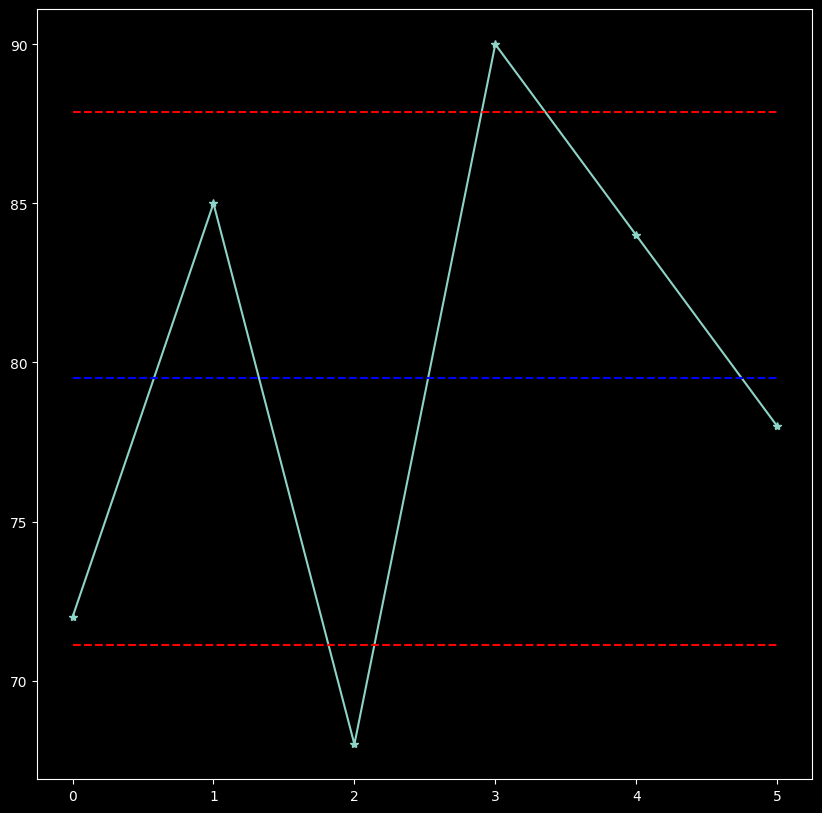

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


X = torch.tensor([[72,120,37.3,104,32.5],
                  [85,130,37.0,110,14],
                  [68,110,38.5,125,34],
                  [90,140,78.0,130,26],
                  [84,132,38.3,146,30],
                  [78,128,37.2,102,12]])
# print(X)

hr = X[:,0]
# print(hr)
norm = torch.norm(hr)
# print(norm)

mc = hr - torch.mean(hr)
# print(f"this mean  {torch.mean(hr)}")
# print(f"this mean centered {mc}")
# print(f"this mean centered {mc}")

sq_mc = mc**2
# print(f"this mean centered sqr {sq_mc}")

v = torch.mean(sq_mc)
# print(f"this is varince {v}")

sd = torch.sqrt(v)
# print(f"this is standerd deveation {sd}")

sd_function = torch.std(hr)
# print(f"this is standerd deveation using std(hr) {sd_function}")

standerized_hr = mc/sd
standerized_hr_using_stdFunction = mc/sd_function
print(f"standerized_hr {standerized_hr}")
# print(f"standerized_hr us std(hr)  {standerized_hr_using_stdFunction}")



mean_line = [torch.mean(hr)]*len(standerized_hr)
# print(mean_line)
fig,(ax1) = plt.subplots(1,1,figsize=(10,10))

component_index =range(0,len(standerized_hr))

#this is normal ploting of the data
mean = [torch.mean(hr)]*len(hr)
mean_line_above = [torch.mean(hr)+torch.std(hr)]*len(standerized_hr_using_stdFunction)
mean_line_below = [torch.mean(hr)-torch.std(hr)]*len(standerized_hr_using_stdFunction)
ax1.plot(component_index,hr,marker="*")
ax1.plot(component_index,mean,color="blue",linestyle="dashed")
ax1.plot(component_index,mean_line_above,color="red",linestyle="dashed")
ax1.plot(component_index,mean_line_below,color="red",linestyle="dashed")


#this is the standardized ploting of the data
standardized_hr = (hr-torch.mean(hr))/torch.std(hr)
print(standardized_hr)

datetime
2012-10-01 13:00:00    289.480000
2012-10-01 14:00:00    289.474993
2012-10-01 15:00:00    289.460618
2012-10-01 16:00:00    289.446243
2012-10-01 17:00:00    289.431869
2012-10-01 18:00:00    289.417494
2012-10-01 19:00:00    289.403119
2012-10-01 20:00:00    289.388745
2012-10-01 21:00:00    289.374370
2012-10-01 22:00:00    289.359995
2012-10-01 23:00:00    289.345621
Name: San Francisco, dtype: float64


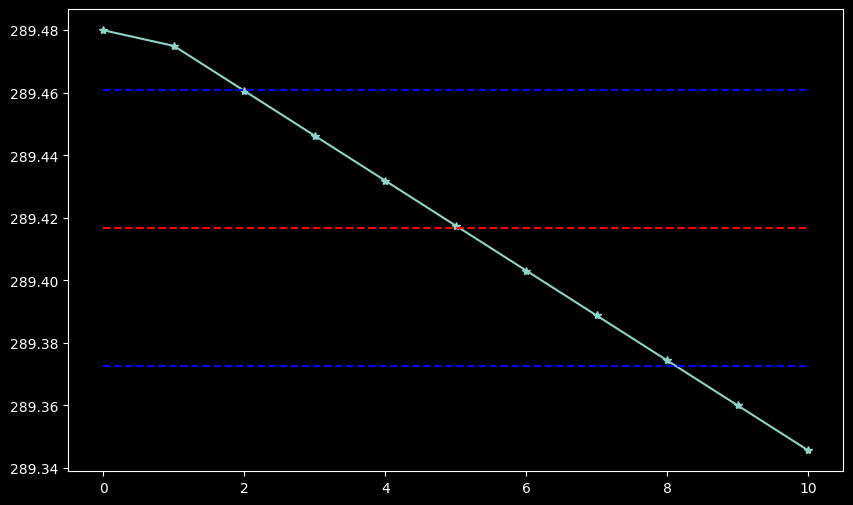

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

FILE = DATA_DIR +'temperature.csv'
# print(FILE)
data_frame = pd.read_csv(FILE,sep=",",header=0,skiprows=[1])
data_frame['datetime'] = pd.to_datetime(data_frame['datetime'], format='%Y-%m-%d %H:%M:%S')

data_frame = data_frame.set_index('datetime')
# print(data_frame)

temp_san = data_frame.iloc[data_frame.index.get_loc('2012-10-01'),data_frame.columns.get_loc('San Francisco')]
print(temp_san)

fig ,(ax1) = plt.subplots(1,1,figsize=(10,6))
component_index = range(len(temp_san))
mean = [np.mean(temp_san)]*len(temp_san)
above = [np.mean(temp_san)+np.std(temp_san)]*len(temp_san)
below = [np.mean(temp_san)-np.std(temp_san)]*len(temp_san)
ax1.plot(component_index,temp_san,marker="*")
ax1.plot(component_index,mean,color="red",linestyle='dashed')
ax1.plot(component_index,above,color="blue",linestyle='dashed')
ax1.plot(component_index,below,color="blue",linestyle='dashed')

In [66]:
import torch
X = torch.tensor([[72,120,37.3,104,32.5],
                  [85,130,37.0,110,14],
                  [68,110,38.5,125,34],
                  [90,140,78.0,130,26],
                  [84,132,38.3,146,30],
                  [78,128,37.2,102,12]])

W = torch.tensor([[-0.1, 0.5, 0.3],
                  [0.9, 0.3, 0.5],
                  [-1.5, 0.4, 0.1],
                  [0.1, 0.1, -1.0],
                  [-1.2, 0.5, -0.8]])
ans = torch.matmul(X,W)
print(ans)
softmax = torch.nn.Softmax(dim=0)

print(softmax(ans))

tensor([[ 16.2500, 113.5700, -44.6700],
        [ 47.2000, 114.3000, -27.0000],
        [  6.1500, 111.9000, -72.9500],
        [-18.2000, 144.2000, -46.0000],
        [ 31.5500, 126.5200, -74.9700],
        [ 47.4000, 108.4800, -20.4800]])
tensor([[1.6292e-14, 4.9838e-14, 3.1173e-11],
        [4.5017e-01, 1.0342e-13, 1.4715e-03],
        [6.6924e-19, 9.3819e-15, 1.6290e-23],
        [1.7804e-29, 1.0000e+00, 8.2445e-12],
        [7.1889e-08, 2.0974e-08, 2.1610e-24],
        [5.4983e-01, 3.0690e-16, 9.9853e-01]])
